## Test the best constant for generating random covariane matrices

In [1]:
from data import *

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
G = generate_random_dag(50, 3, seed=123)

In [3]:
X, cov, cov_prev = generate_linear_sem_correlated(G, 1000, 0.5, seed=123, return_cov=True)

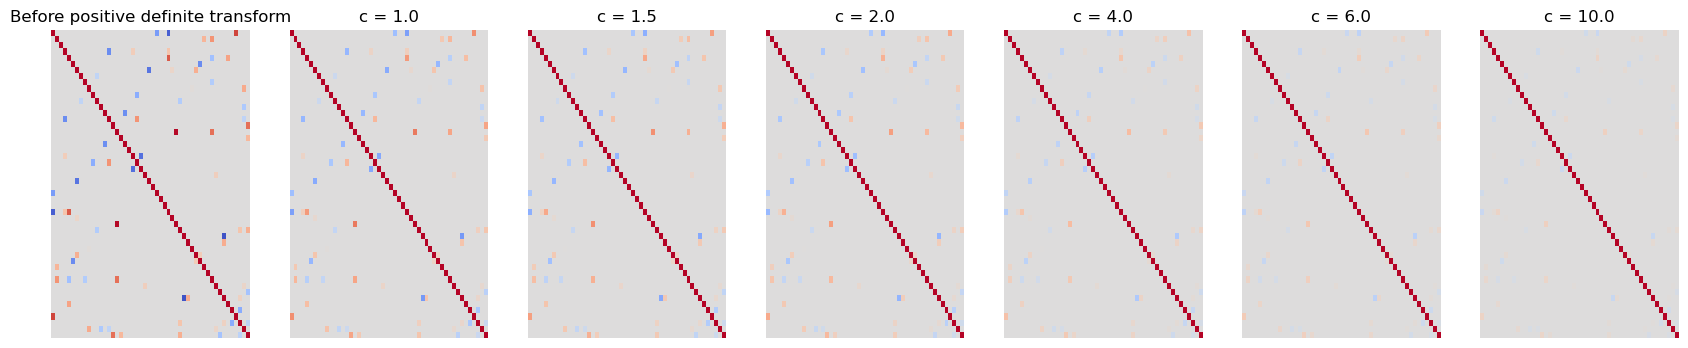

In [4]:
fig, axes = plt.subplots(1, 7, figsize=(21, 4))

sns.heatmap(cov_prev, ax=axes[0], cmap='coolwarm', vmin=-1, vmax=1)
axes[0].set_title('Before positive definite transform')
axes[0].collections[0].colorbar.remove()
axes[0].axis('off')

for idx, c in enumerate([1.0, 1.5, 2.0, 4.0, 6.0, 10.0]):
    X, cov, cov_prev = generate_linear_sem_correlated(G, 1000, 0.5, seed=123, return_cov=True, const=c)
    sns.heatmap(cov, ax=axes[idx+1], cmap='coolwarm', vmin=-1, vmax=1)
    axes[idx+1].set_title(f'c = {c}')
    # remove the colorbar
    axes[idx+1].collections[0].colorbar.remove()
    # remove the axis
    axes[idx+1].axis('off')


plt.savefig('plots/const_psd_transform.png', dpi=300, bbox_inches='tight', facecolor='white')

## Plot examples

In [20]:
G1 = generate_random_dag(10, 3, seed=123)

X, G2 = generate_linear_sem_correlated(G1, 1000, 0.3, seed=123, return_graph=True)

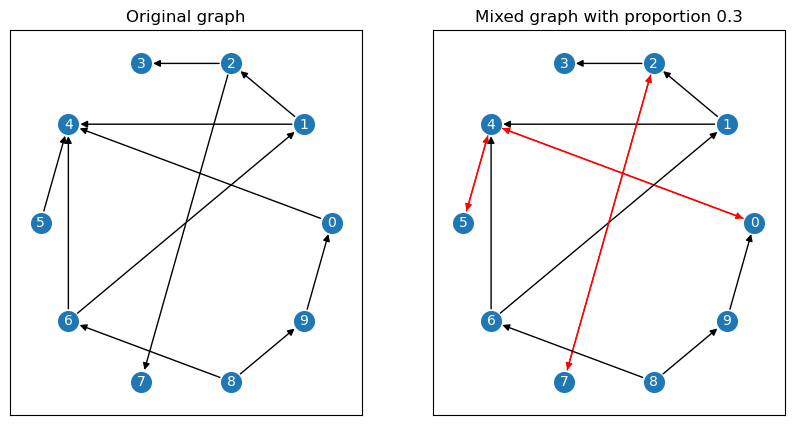

In [21]:
pos = nx.circular_layout(G1)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

nx.draw_networkx_nodes(G1, pos, node_size=200, ax=axes[0], )
nx.draw_networkx_edges(G1, pos, ax=axes[0])
nx.draw_networkx_labels(G1, pos, labels={node: node for node in G1.nodes()}, font_size=10, font_color='w', ax=axes[0])

axes[0].set_title('Original graph')

# create a list of edge colors based on the edge type
edge_colors = ['r' if G2.has_edge(u, v) and G2.has_edge(v, u) else 'k' for u, v in G2.edges()]

nx.draw_networkx_nodes(G2, pos, node_size=200, ax=axes[1])
nx.draw_networkx_edges(G2, pos, edge_color=edge_colors, ax=axes[1])
nx.draw_networkx_labels(G2, pos, labels={node: node for node in G2.nodes()}, font_size=10, font_color='w', ax=axes[1])

axes[1].set_title('Mixed graph with proportion 0.3')

plt.savefig('plots/mixed_graph_example.png', dpi=300, bbox_inches='tight', facecolor='white')